In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('mymoviedb.csv', lineterminator='\n')


In [3]:
df.head(4)


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...


In [4]:
df['Release_Date']=pd.to_datetime(df['Release_Date'])


In [5]:
df['Release_Date']=(df['Release_Date']).dt.year

In [6]:
cols=['Overview','Original_Language','Poster_Url']
df.drop(cols,axis=1,inplace=True)
df.head(6)


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"
5,2022,The Commando,1750.484,33,6.6,"Action, Crime, Thriller"


In [7]:
def categorise_col(df,col,labels):
    edges=(df[col].describe()['min'],
           df[col].describe()['25%'],
           df[col].describe()['50%'],
           df[col].describe()['75%'],
           df[col].describe()['max'])
    df[col]=pd.cut(df[col], edges, labels = labels, duplicates='drop')
    return df

In [8]:
labels=['not_popular','least_popular','less_popular','popular']
categorise_col(df,'Vote_Average',labels)
df['Vote_Average'].unique()



['popular', 'least_popular', 'less_popular', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'least_popular' < 'less_popular' < 'popular']

In [9]:
df['Vote_Average'].value_counts()


Vote_Average
not_popular      2467
popular          2450
less_popular     2412
least_popular    2398
Name: count, dtype: int64

In [10]:
df.dropna(inplace=True)
df.isna().sum()


Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [11]:
df['Genre']=df['Genre'].str.split(', ')
df=df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [12]:
df['Genre']=df['Genre'].astype('category')
df['Genre'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 25552 entries, 0 to 25551
Series name: Genre
Non-Null Count  Dtype   
--------------  -----   
25552 non-null  category
dtypes: category(1)
memory usage: 25.8 KB


In [13]:
sns.set_style('whitegrid')

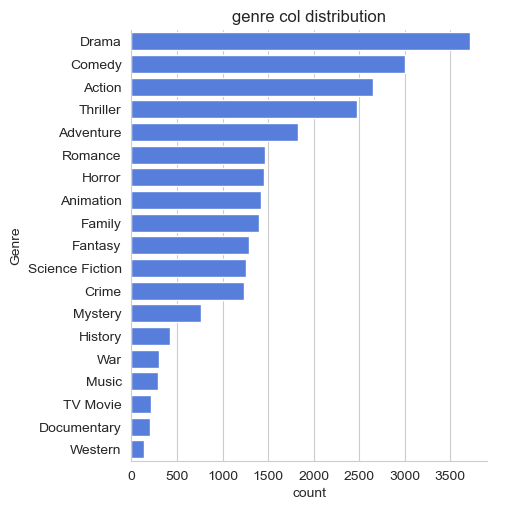

In [14]:
sns.catplot(y=df['Genre'],data=df,kind='count',
            order=df['Genre'].value_counts().index,
            color='#4275f2')
plt.title("genre col distribution")
plt.show()

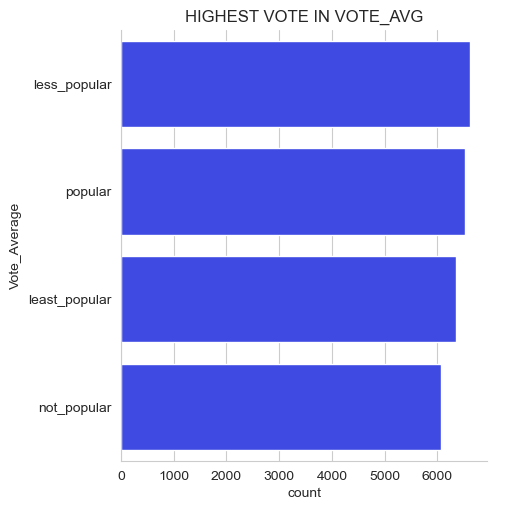

In [15]:
sns.catplot(y=df['Vote_Average'],data =df,kind = 'count',
            order=df['Vote_Average'].value_counts().index,
            color='#2333fd')
plt.title("HIGHEST VOTE IN VOTE_AVG")
plt.show()

In [16]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure


In [17]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


A.Spider-Man: No Way Home

In [18]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,less_popular,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,less_popular,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,less_popular,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


A.The United States vs. Billie Holiday is one of the movie and its genre is music, drama, history. The second one is Threads in genre war,drama,science fiction.

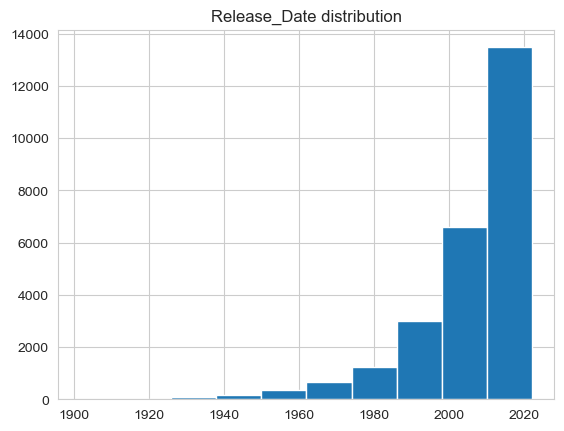

In [19]:
df['Release_Date'].hist()
plt.title('Release_Date distribution')
plt.show()